<a href="https://colab.research.google.com/github/sonia1313/Face-Emotion-Recognition-Project/blob/main/train_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Face-Emotion-Recognition-Project' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.gitignore', 'LICENSE', 'README.md', 'src', 'models', 'personal_dataset', '.git', '.vscode', '__pycache__', 'CW_Dataset', 'test_function.ipynb', 'train_function.ipynb']


In [ ]:
import sys
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'models')
sys.path.append(CODE_PATH)

In [ ]:
zip_path = os.path.join(GOOGLE_DRIVE_PATH,'CW_Dataset/CW_Dataset.zip')

# Copy it to Colab
!cp '{zip_path}' .

# Unzip it
!yes|unzip -q CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CW_Dataset.zip

replace test/test_0288_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_0828_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_1505_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_0317_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_1055_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_0647_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_2986_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_1923_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_0591_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_2326_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_1383_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_2676_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_3064_aligned.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace test/test_2819_aligned.jpg? [y

In [ ]:
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'src')
sys.path.append(CODE_PATH)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from data_loader import import_selected_data
from collections import  Counter
import numpy as np

In [ ]:
X_train,y_train = import_selected_data('train')

In [ ]:
n_samples, x,y = X_train.shape
print(n_samples)
print(x)
print(y)

12271
100
100


In [ ]:
X_train = X_train.reshape((n_samples,x*y))
X_train.shape

(12271, 10000)

In [ ]:
Counter(y_train)

Counter({1: 1290, 2: 281, 3: 717, 4: 4772, 5: 1982, 6: 705, 7: 2524})

1: Surprise
2: Fear
3: Disgust
4: Happiness
5: Sadness
6: Anger
7: Neutral

preproccessing : http://rstudio-pubs-static.s3.amazonaws.com/454441_79ebb625c3ee47a18f88c61490f43c22.html

https://machinelearningmastery.com/multi-class-imbalanced-classification/
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-cross-validation-and-hyperparameter-tuning-using-gridsearch

https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-glass-identification-dataset/

Making data more balanced by using ADASYN
https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def balance_dataset(X,y):
  strategy = {2:1000, 3:1000, 6:1000}
  over = SMOTE(sampling_strategy=strategy)
  sampledX, sampledY = over.fit_sample(X,y)
  return sampledX, sampledY

In [ ]:
X_train_sampled, y_train_sampled  = balance_dataset(X_train,y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y_train_sampled)

Counter({1: 1290, 2: 1000, 3: 1000, 4: 4772, 5: 1982, 6: 1000, 7: 2524})

In [ ]:
!pip install opencv-python==4.4.0.46

In [ ]:
import cv2
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte, io, color
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

%matplotlib inline

In [ ]:
cv2.__version__

'4.4.0'

In [ ]:
X_train[0].dtype

dtype('float64')

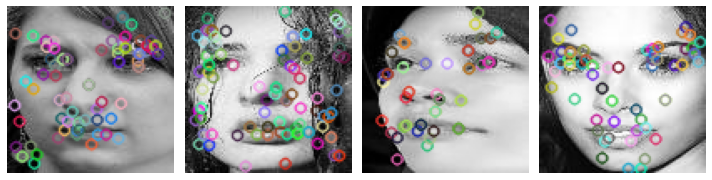

In [ ]:
X_train_img = X_train.reshape(-1, 100, 100)

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Create empty lists for feature descriptors and labels
des_list = []
y_train_list = []

fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)

for i in range(len(X_train_img)):
    # Identify keypoints and extract descriptors with SIFT
    img = img_as_ubyte(color.rgb2gray(X_train_img[i]))
    kp, des = sift.detectAndCompute(img, None)

    # Show results for first 4 images
    if i<4:
        img_with_SIFT = cv2.drawKeypoints(img, kp, img)
        ax[i].imshow(img_with_SIFT)
        ax[i].set_axis_off()

    # Append list of descriptors and label to respective lists
    if des is not None:
        des_list.append(des)
        y_train_list.append(y_train[i])

fig.tight_layout()
plt.show()

# Convert to array for easier handling
des_array = np.vstack(des_list)

NEED TO USE HYPER-PARAMETER TUNING

In [33]:
# Number of centroids/codewords: good rule of thumb is 10*num_classes
k = len(np.unique(y_train)) * 10

# Use MiniBatchKMeans for faster computation and lower memory usage
batch_size = des_array.shape[0] // 4
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size).fit(des_array)

In [34]:
# Convert descriptors into histograms of codewords for each image
hist_list = []
idx_list = []

for des in des_list:
    hist = np.zeros(k)

    idx = kmeans.predict(des)
    idx_list.append(idx)
    for j in idx:
        hist[j] = hist[j] + (1 / len(des))
    hist_list.append(hist)

hist_array = np.vstack(hist_list)

In [35]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel='rbf')

# We learn the digits on the first half of the digits
classifier.fit(hist_array, y_train_list)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
def get_feature_descriptor(X_test, y_test):
  hist_list = []

  for i in range(len(X_test)):
      img = img_as_ubyte(color.rgb2gray(X_test[i]))
      kp, des = sift.detectAndCompute(img, None)

      if des is not None:
          hist = np.zeros(k)

          idx = kmeans.predict(des)

          for j in idx:
              hist[j] = hist[j] + (1 / len(des))

          # hist = scale.transform(hist.reshape(1, -1))
          hist_list.append(hist)

      else:
          hist_list.append(None)
      #print(len(hist_list))
  # Remove potential cases of images with no descriptors
  idx_not_empty = [i for i, x in enumerate(hist_list) if x is not None]
  hist_list = [hist_list[i] for i in idx_not_empty]
  y_test = [y_test[i] for i in idx_not_empty]
  hist_array = np.vstack(hist_list)
  return hist_array, y_test

In [59]:
X_test, y_test = import_selected_data('test')

In [60]:
print(len(X_test))

3068


In [61]:
print(len(y_test))

3068


In [81]:
Counter(y_test)

Counter({1: 329, 2: 74, 3: 160, 4: 1184, 5: 478, 6: 162, 7: 679})

In [62]:
hist_array, y_test = get_feature_descriptor(X_test, y_test)

In [63]:
print(len(hist_array))

3066


In [64]:
predicted = classifier.predict(hist_array).tolist()

In [65]:
len(predicted)

3066

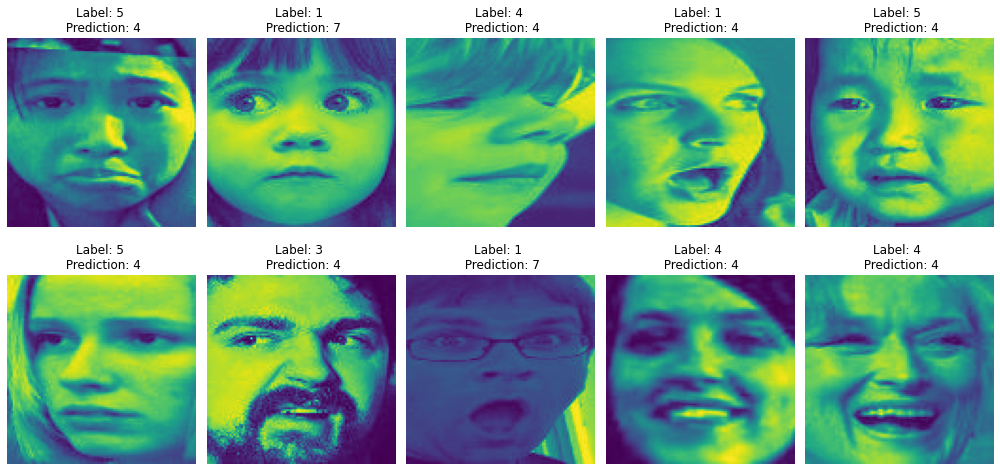

In [75]:
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_test[i])
    ax[i].set_title(f'Label: {y_test[i]} \n Prediction: {predicted[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

In [67]:
print(f"""Classification report for classifier {classifier}:
      {metrics.classification_report(y_test, predicted)}\n""")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
                    precision    recall  f1-score   support

           1       0.39      0.06      0.11       329
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00       160
           4       0.43      0.86      0.57      1184
           5       0.44      0.08      0.13       478
           6       0.00      0.00      0.00       162
           7       0.36      0.30      0.32       679

    accuracy                           0.42      3066
   macro avg       0.23      0.19      0.16      3066
weighted avg       0.36      0.42      0.33      3066




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


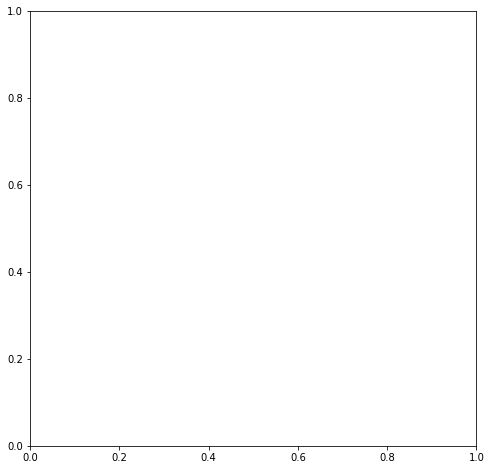

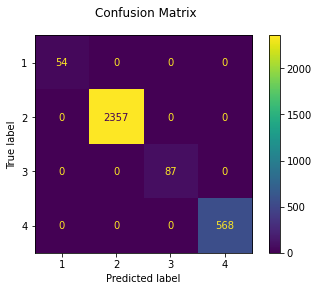

In [80]:
fig, ax = plt.subplots(figsize=(8, 8))
disp = metrics.plot_confusion_matrix(classifier, list(hist_array), list(predicted), values_format = 'd')
disp.figure_.suptitle("Confusion Matrix")
plt.show()

have to fix color images
have to fixx normalisation
have to fix hyper parameter tuning 